**SciPy** - это библиотека, которая содержит набор математических алгоритмов и функций, построенных на основе библиотеки NumPy. Она предоставляет пользователю готовые функции и классы для математических вычислений и манипулирования данными. 

Обычно SciPy используют с библиотеками Matplotlib, NumPy, Pandas. Так вот. Язык Python в связке с этими библиотеками вполне может конкурировать со специальными математическими пакетами и системами такими как **MATLAB, Octave, SciLab, Maple** и прочими. Некоторые из которых даже платные.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Структура SciPy

Организация подпакетов:

Название|	Описание|
--------|-----------|
cluster|	Алгоритмы кластерного анализа|
constants|	Физические и математические константы|
fftpack|	Быстрое преобразование Фурье|
integrate|	Решения интегральных и обычных дифференциальных уравнений|
interpolate|	Интерполяция и сглаживание сплайнов|
io|	Ввод и вывод|
linalg|	Линейная алгебра|
ndimage|	N-размерная обработка изображений|
odr|	Метод ортогональных расстояний|
optimize|	Оптимизация и численное решение уравнений|
signal|	Обработка сигналов|
sparse|	Разреженные матрицы|
spatial|	Разреженные структуры данных и алгоритмы|
special|	Специальные функции|
stats|	Статистические распределения и функции|

Чтобы пользоваться функциями из подпакета его надо импортировать отдельно:

In [1]:
from scipy import linalg

Для того, чтобы постоянно не смотреть в документацию есть несколько специальных справочных функций, которые можно вызывать прямо в коде: **help** и **source**.

**help()** - позволяет получить информацию о любой функции из пакета или информацю о подпакете:

In [3]:
# help(linalg) # информация о подпакете linalg

In [6]:
# help(linalg.inv) # информация о функции, которое вычисляет обратную матрицу

Функция **source** позволяет посмотреть исходный код функции:

In [8]:
from scipy import source
# source(linalg.inv) # посмотрия на исходный код функции inv

Теперь пройдёмся по основным подпакетам и их функциям.

## Специальные функции (scipy.special)

Подпакет **scipy.special** содержит набор  специальных функций математической физики: тригонометрические функции, обратные тригонометрические функции, логарифмические функции и экспоненциальные функци, эллиптические функции, гамма, бета, Бесселя, Струви, Келвина, гипергеометрические и т.д. 

In [9]:
from scipy import special
 
sin_of_90_degrees = special.sindg(90)
print(sin_of_90_degrees)

1.0


## Интегральные функции (scipy.integrate)

**scipy.integrate** —  это про численное интегрирование (методы трапеции, Симпсона, Ромберга и др.), решение обыкновенных дифференциальных уравнений (ОДУ); функции для решения интегралов.

В модуле **scipy.integrate** есть несколько функций для вычисления определённых интегралов. Наиболее простой является
функция **quad()**, которая вычисляет обычный интеграл от одной переменной и имеет следующий синтаксис:
```quad (func, a, b, …)```, где:
* func — имя подынтегральной функции
* a — нижний предел интегрирования 
* b — верхний предел интегрирования

Например посчитаем интеграл: $$\int_{0}^{4}3{x}^{2}dx$$

In [10]:
from scipy import integrate

def target_function_f(x):
    return 3.0 * x ** 2

result = integrate.quad(target_function_f, 0.0, 4.0)
print(result)

(64.00000000000001, 7.105427357601004e-13)


Функция **quad()** возвращает кортеж из двух элементов, первый — значение интеграла, второй — точность вычисления. В данном случае  получен с точностью до 13-го знака после запятой. Есть и другие методы нахождения интегралов: **trapz() (метод трапеций), sims() (метод Симпсона), romb() (метод Ромберга)** и т.д.

Также давайте посмотрим как решить простенькое **ОДУ**: $$\frac{dx}{dy}=-2y$$

Для этого есть функция **odeint()** следующего вида: ```odeint(func, y0, x, …)```, где:
* func — список функций правых частей уравнений;
* y0 — список начальных условий;
* x — массив точек, в которых необходимо найти значение искомой функции $\bar{y}(x)$;
* многоточием обозначены необязательные аргументы.

Функция **odeint()** возвращает двумерный массив типа **ndarray** значений функции $y$ во всех заданных точках $x$. Начальное значение y0 хранится в первой строке. Массив решения имеет следующую форму (shape): (len(x), len(y0)). То есть число строк равно количеству точек интегрирования, число столбцов — количеству уравнений. 

Например, в случае интегрирования одного уравнения результатом работы функции **odeint()** будет **двумерный массив**, содержащий один столбец, в котором хранятся значения искомой функции, начиная с y0.

In [13]:
import matplotlib.pyplot as plt

In [14]:
from scipy import integrate
import numpy as np

def target_function(y, x):
    return -2.0 * y

xi = np.linspace(0, 1, 10)
y0 = 1.0
result = integrate.odeint(target_function, y0, xi)
print(result)

[[1.        ]
 [0.80073742]
 [0.64118042]
 [0.51341714]
 [0.41111231]
 [0.329193  ]
 [0.26359714]
 [0.21107209]
 [0.16901331]
 [0.13533527]]


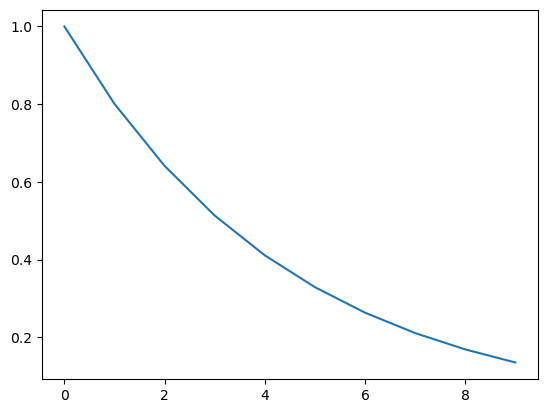

In [15]:
plt.plot(result[:,0])

### Уравнение гармонических колебаний: $\frac{d^2x}{dt^2}+\omega^2x=0$ c начальными условиями $x(0) = {x}_{0} = –5$, $\frac{dx}{dt(0)} = {v}_{0} = 0$ при $\omega=1.5$. 

### Сведем данное уравнение второго порядка к системе двух уравнений первого порядка с помощью замены: $\frac{dx}{dt}=v, \frac{dv}{dt}=\frac{d^2x}{dt^2}$. 

### Тогда получим: $\frac{dv}{dt}=-\omega^2x, \frac{dx}{dt}=v$ c начальными условиями $x(0) = {x}_{0}, v(0) = {v}_{0}$.

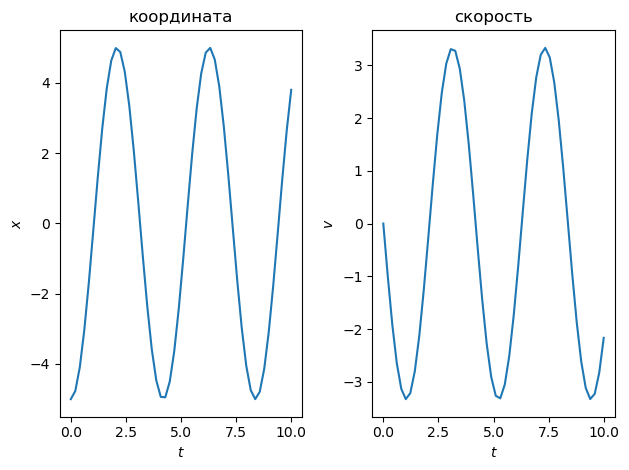

In [16]:
from scipy import integrate
import numpy as np
from matplotlib import pyplot as plt

# частота гармонического осциллятора
w = 1.5
# вектор-функция правых частей уравнений:
# f = [f0, f1], где f0 = -w^2*x, f1 = v.
# полагается, что f зависит от (y, t), причём y - это
# список из двух чисел:
# y = [v, x]
def f(y, t):
    v = y[0]
    x = y[1]
    f0 = -w ** 2 * x
    f1 = v
    return [f0, f1]

# массив точек интегрирования
ti = np.linspace(0, 10, 50)

# начальная координата
x0 = -5.0

# начальная скорость
v0 = 0.0
# список начальных условий
y0 = [x0, v0]

# решение ОДУ
sol = integrate.odeint(f, y0, ti)

# рисунок для построения графиков функций x(t) и v(t)
fig = plt.figure()

# панель для рисования графика координаты
ax1 = fig.add_subplot(121)

# панель для рисования графика скорости
ax2 = fig.add_subplot(122)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$x$')
ax1.set_title('координата')

# график x(t) - зависимость нулевого столбца вектора
# решения sol от ti
ax1.plot(ti, sol[:, 0])
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$v$')
ax2.set_title('скорость')

# график v(t) - зависимость первого столбца вектора
# решения sol от ti
ax2.plot(ti, sol[:, 1])

# настройка оптимального расположения панелей
plt.tight_layout()

## Интерполяция (scipy.interpolate)

Если по простому,то **интерполяция** — это построение новых точек на основе известных. **scipy.interpolate** содержится набор функций для интерполяции одномерных и многомерных данных. Интерполяции одномерного набора данных возможна с помощью функции **interp1d()**. Синтаксис: ```fi = interp1d(x, f0, 'method', …)```. Функция **interp1d()** принимает в качестве первых двух аргументов одномерные массивы координат $x$ и соответствующих значений некоторой величины f0. 

Реализовано несколько способов интерполяции: 
* линейная ('method'='linear');
* квадратичная('method'='qudratic');
* кубическая ('method'='cubic') и т.д.

По умолчанию, когда параметр **'method'** не указан, используется линейная интерполяция. См. документацию. 

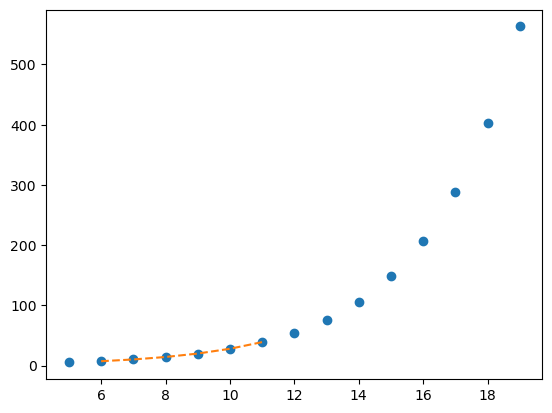

In [17]:
# пример попроще
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.arange(5, 20)
y = np.exp(x/3.0)

f = interpolate.interp1d(x, y)

x1 = np.arange(6, 12)
y1 = f(x1)   # использовать функцию интерполяции, возвращаемую `interp1d`

plt.plot(x, y, 'o', x1, y1, '--') # o - исходня функция, -- - то, что мы наинтерполировали
plt.show()

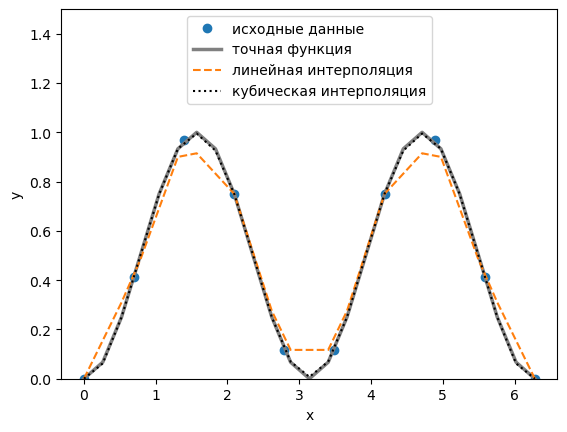

In [18]:
# пример посложнее 
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# функция для генерации данных,
# по которым будет строиться интерполяция
def f_exact(x):
    return np.sin(x)**2

# массив координат, по которым будет делаться интерполяция
x = np.linspace(0, 2.0 * np.pi, 10)

# массив значений, по которым будет делаться интерполяция
y = f_exact(x)

# интерполяция данных методом по умолчанию
# (линейная интерполяция)
fi_1 = interp1d(x, y, 'linear')

# кубическая интерполяция
fi_2 = interp1d(x, y, 'cubic')

# массив координат для построения
# графика интерполированных функций
xi = np.linspace(0, 2.0 * np.pi, 25)

# массивы значений интерполированых функций
# для построения графиков
yi_1 = fi_1(xi)
yi_2 = fi_2(xi)

# настройки осей
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0.0, 1.5)

# рисование графиков
plt.plot(x, y, 'o', label='исходные данные')
plt.plot(xi, f_exact(xi), '-', color='grey', linewidth=2.5, label='точная функция')
plt.plot(xi, yi_1, '--', label='линейная интерполяция')
plt.plot(xi, yi_2, 'k:', label='кубическая интерполяция')

# легенда, располагающаяся сверху по центру панели
plt.legend(loc='upper center')
plt.show()

## Оптимизация (scipy.optimize)

**scipy.optimize** представляет набор функций, которые реализуют популярные алгоритмы оптимизаци: максимизация, минимизация функции, подбор кривой, поиск корня и т.д.

Чуть подробнее:
* Неограниченная и ограниченная минимизация многомерных скалярных функций, то есть minimize (например, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, метод сопряженных градиентов, метод Нелдера — Мида и так далее);
* Глобальная оптимизация (дифференциальная эволюция, двойной отжиг и т. д.);
* Минимизация наименьших квадратов и подбор кривой (метод наименьших квадратов, приближение с помощью кривых и т. д.);
* Минимизаторы скалярных одномерных функций и численное решение уравнений (минимизация скаляра и скаляр корня);
* "Решатели" систем многомерных уравнений с помощью таких алгоритмов, как Пауэлла, Левендберга — Марквардта и ещё куча всего.

Пусть у нас есть какая-то функция $f(x)=x^2+10sin(x)$. Найдём её **минимум**:

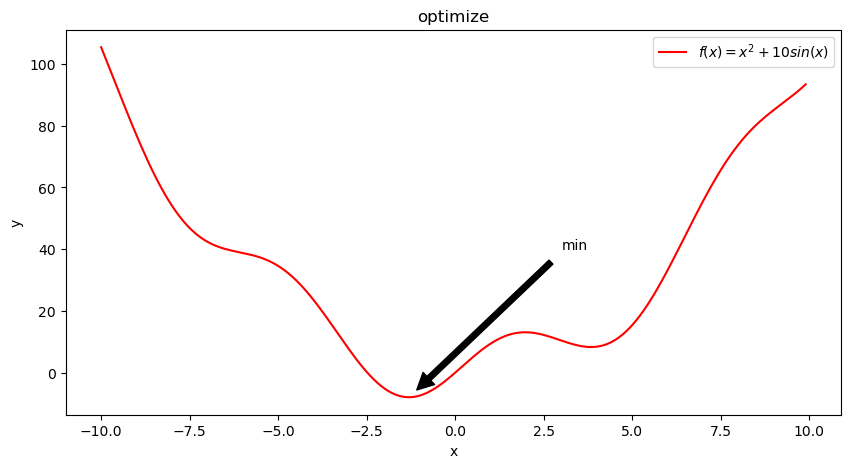

In [19]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
 
def target_function(x):
    return x ** 2+10*np.sin(x)
 
# график целевой функции
plt.figure(figsize=(10,5))
x = np.arange(-10, 10, 0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('optimize')
plt.plot(x, target_function(x), 'r-', label='$f(x)=x^2+10sin(x)$')

 # Наименьшее значение функции точки на изображении
a = target_function(-1.3)

plt.annotate('min',xy=(-1.3,a),xytext=(3,40),arrowprops=dict(facecolor='black',shrink=0.05))
plt.legend()
plt.show()

Можно использовать алгоритм поиска **методом перебора**, который будет оценивать каждую точку в сетке диапазонов.

In [20]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(target_function, (grid,))
print(xmin_global) # наша точка минимума

[-1.30641113]


Если область определения функции достаточно большая, то **brute()** становится очень медленным. Можно взять функцию **scipy.optimize.anneal() -  алгоритм имитации отжига**:

In [21]:
xmin_global = optimize.dual_annealing(target_function, (grid,))
print(xmin_global) # наша точка минимума

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: -7.945823375615271
       x: [-1.306e+00]
     nit: 1000
    nfev: 2017
    njev: 8
    nhev: 0


Далее классический пример минимум функции Розенброка **методом наименьших квадратов**:

In [22]:
# функция Розенброка
def fun_rosenbrock(x):
    return np.array([10 * (x[1] - x[0] ** 2), (1 - x[0])])
   
from scipy.optimize import least_squares

input_data = np.array([2, 2])
result = least_squares(fun_rosenbrock, input_data)

print(result)

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-6.661e-15 -2.220e-16]
           x: [ 1.000e+00  1.000e+00]
        cost: 2.2211364862629114e-29
         jac: [[-2.000e+01  1.000e+01]
               [-1.000e+00  0.000e+00]]
        grad: [ 1.334e-13 -6.661e-14]
  optimality: 1.3344880855256055e-13
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 3
        njev: 3


## Функции преобразования Фурье (scipy.fft)

**Преобразование Фурье** вычисляется на сигнале временной области, чтобы проверить его поведение в частотной области. Применяется при обработке сигналов и шумов, обработка изображений, обработка аудиосигналов и т.д. 

SciPy предлагает модуль **fftpack**, который позволяет пользователю быстро вычислять преобразования Фурье. Функции **fft** используются для получения дискретной трансформации Фурье реальной или комплексной последовательности.

**scipy.fftpack** использует:
* scipy.fftpack.fftfreq (): создать последовательность выборки;
* scipy.fftpack.fft (): вычислить быстрое преобразование Фурье.

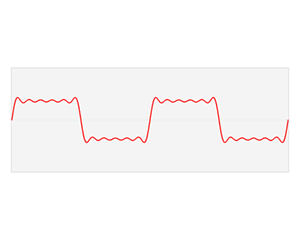

## Обработка сигналов (scipy.signal)

**scipy.signal** - функции обработки сигналов и некоторые функции фильтрации,инструменты проектирования фильтров и несколько алгоритмов интерполяции B-сплайнов для одномерных и двумерных данных. 

**Обработка сигналов** — это область анализа, модификации и синтеза сигналов: звуков, изображений и т. д. 

**Сигналы**

Подпакет **scipy.signal** также состоит из функций, с помощью которых можно генерировать сигналы. Одна из таких — **chirp**. Она является генератором частотно-модулированного сигнала: ```chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)```:

## Константы (scipy.constants)

Пакет **scipy.constants** предоставляет различные математические и физические константы.

In [24]:
from scipy import constants

print("sciPy - pi = %.16f" % constants.pi)

sciPy - pi = 3.1415926535897931


Доступны такие константы как **Пи, золотое сечение, скорость света, гравитационная постоянная G(постоянная Ньютона), e, масса протона** и т.д.

In [25]:
# решим простую задачу за 7 класс физики. Масса человека 68 кг. Нужно найти его вес.
# ускорение свободного падения считать стандартным

mass = 68
print('P = m * g')
print('G: ', constants.g)
print('Мой вес:', mass * constants.g, 'H')

P = m * g
G:  9.80665
Мой вес: 666.8521999999999 H


## Линейная алгебра (scipy.linalg)

**Линейная алгебра** - это про уравнения, их представление с помощью векторных пространств и матриц. Функции из области линейной алгебры есть и в **numpy.linalg**, но **scipy.linalg** будет пожирнее. 

Так функция **scipy.linalg.solve** решает **линейное уравнение** вида $ax+by=Z$ для неизвестных значений $x$, $y$. Рассмотрим на примере. **Решим следующую систему уравнений**: \begin{matrix}
 &  & \\ x+3y+5z=10
 &  & \\ 2x+5y+z=8
 &  & \\ 2x+3y+8z=3
\end{matrix}.

In [26]:
from scipy import linalg
import numpy as np

# записываем коэффиценты левой части
a = np.array([[1, 3, 5],
              [2, 5, 1], 
              [2, 3, 8]])

# записываем ответы из правой части
b = np.array([10,
              8,
              3])

result = linalg.solve(a, b)
print(result)

[-9.28  5.16  0.76]


Соответственно, x=-9.28, y=5.16, z=0.76.

Теперь попробуем вычислить **определитель матрицы**: $ A=\begin{pmatrix}
 1 & 2 \\ 
 3 & 4
\end{pmatrix}$

In [ ]:
from scipy import linalg
import numpy as np

# матрица
A = np.array([[1,2],
              [3,4]])

deter = linalg.det(A)
print(deter)

Функция **scipy.linalg.eig** возвращает **собственные значения и собственные векторы** матрицы. Например, найдём их для $ A=\begin{pmatrix}
 1 & 2 \\ 
 3 & 4
\end{pmatrix}$

In [ ]:
A = np.array([[1,2],
              [3,4]])

l, v = linalg.eig(A)

# собственные значения
print(l)
print()
# векторы
print(v)

Функция **scipy.linalg.svd** отвечает за **сингулярное разложение матрицы** на две унитарные матрицы $U$ и $V$ и одномерный массив $s$ сингулярных значений.

In [27]:
from scipy import linalg
import numpy as np

# создадим случайную матрицу
a = np.random.randn(3, 2) + 1.j*np.random.randn(3, 2)
print(a)
print()
# применяем svd
U, s, Vh = linalg.svd(a)

print (U, Vh, s, sep='\n\n')

[[ 0.31556976+0.65543359j -1.36094501-0.42556752j]
 [ 0.880399  -0.21369956j  0.18952168+1.92885849j]
 [-1.13365941-0.59739829j -0.86329586+0.43292281j]]

[[ 0.03427195-0.57478821j  0.23429829+0.09413502j  0.64902741-0.42831096j]
 [-0.76564378+0.19659593j  0.13035196-0.02510798j  0.43901246+0.405938j  ]
 [-0.05617396-0.20106733j -0.80102134-0.52629429j  0.19431999+0.00594029j]]

[[-0.3334519 +0.j          0.14609008-0.93137936j]
 [ 0.94276711+0.j          0.05167131-0.32942411j]]

[2.69365799 1.56799773]


Функция **linalg.inv** позволяет найти **обратную матрицу**:

In [28]:
A = np.array([[1,2], 
              [4,3]])
print('Первоначальная матрица A:')
print(A)

B = linalg.inv(A)

print('\nОбратная А матрица:')
print(B)

Первоначальная матрица A:
[[1 2]
 [4 3]]

Обратная А матрица:
[[-0.6  0.4]
 [ 0.8 -0.2]]


## Алгоритмы кластерного анализа (scipy.cluster)

**scipy.cluster** содержит набор алгоритмов кластеризации, например, **K-means**. Кластеризация K-средних – это метод поиска кластеров и центров кластеров в наборе немаркированных данных. Интуитивно, мы можем думать о кластере как о состоящем из группы точек данных, чьи расстояния между точками малы по сравнению с расстояниями до точек вне кластера. 

In [29]:
from scipy.cluster.vq import kmeans, vq, whiten
from numpy import vstack,array
from numpy.random import rand

# сгенерируем сдучайные данные
data = vstack((rand(100,3) + array([.5,.5,.5]),rand(100,3)))
print(data[:5], '\n')

# почистим данные
data = whiten(data)

# вычисляем K-Means с 3 кластерами
centroids, _ = kmeans(data, 3)
print(centroids, '\n')

# разделим значения по пренадлежности к кластеру
clx, _ = vq(data, centroids)
print(clx)

[[0.57792945 1.16704386 1.07205159]
 [1.33809119 1.36243959 0.59491546]
 [0.633685   1.17362525 0.52694268]
 [0.66978958 0.73538854 1.40896427]
 [1.49808946 0.55257263 1.2135903 ]] 

[[3.00649358 2.63795815 2.93274234]
 [1.00352514 0.93698202 1.09327483]
 [2.14216617 1.71547586 1.82592041]] 

[0 0 2 0 0 0 2 2 0 0 0 2 0 0 0 0 2 0 2 2 0 0 0 2 0 2 2 2 2 0 0 0 0 0 0 2 0
 2 0 0 0 0 2 2 1 0 2 0 0 2 2 2 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 1 2 2 2 1 1 2 1 2 1 1
 1 1 2 1 1 1 2 2 2 1 1 2 2 1 1 1 1 2 2 2 1 2 1 2 2 1 2 1 2 1 2 2 1 1 1 1 2
 2 2 2 1 1 1 2 2 1 2 2 2 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 2 2 2
 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1]
